# 95-865: Basic Text Processing with spaCy Part 2

Author: George H. Chen (georgechen [at symbol] cmu.edu)

This demo begins by showing how to do the same analysis as the previous code demo but now using 1D and 2D arrays. These ideas will be extremely important later on in 95-865. Especially in terms of how neural networks are commonly used to model text, we will be converting text into these sorts of array representations.

In [3]:
import spacy
nlp = spacy.load('en_core_web_sm')  # load spaCy's built-in English models

In [4]:
text = open('opioid_epidemic.txt').read()  # open text file of text from opioid epidemic Wikipedia page

In [5]:
parsed_text = nlp(text)

### Determine vocabulary

For simplicity, let's build a vocabulary without using lemmatization and without removing stop words.

In [6]:
word_to_idx = {}  # key: vocabulary word
                  # value: unique integer index assigned to the vocabulary word (starting at 0)
current_word_idx = 0

for token in parsed_text:
    word = token.orth_
    if word not in word_to_idx:
        word_to_idx[word] = current_word_idx
        current_word_idx += 1

vocab_size = current_word_idx  # you can check that indeed `vocab_size` is equal to `len(word_to_idx)`
print(f'Found {vocab_size} vocabulary words')

Found 2073 vocabulary words


In [10]:
word_to_idx

{'The': 0,
 'opioid': 1,
 'epidemic': 2,
 'or': 3,
 'crisis': 4,
 'is': 5,
 'the': 6,
 'rapid': 7,
 'increase': 8,
 'in': 9,
 'use': 10,
 'of': 11,
 'prescription': 12,
 'and': 13,
 'non': 14,
 '-': 15,
 'drugs': 16,
 'United': 17,
 'States': 18,
 'Canada': 19,
 '2010s': 20,
 '.': 21,
 'Opioids': 22,
 'are': 23,
 'a': 24,
 'diverse': 25,
 'class': 26,
 'moderately': 27,
 'strong': 28,
 'painkillers': 29,
 ',': 30,
 'including': 31,
 'oxycodone': 32,
 '(': 33,
 'commonly': 34,
 'sold': 35,
 'under': 36,
 'trade': 37,
 'names': 38,
 'OxyContin': 39,
 'Percocet': 40,
 ')': 41,
 'hydrocodone': 42,
 'Vicodin': 43,
 'very': 44,
 'painkiller': 45,
 'fentanyl': 46,
 'which': 47,
 'synthesized': 48,
 'to': 49,
 'resemble': 50,
 'other': 51,
 'opiates': 52,
 'such': 53,
 'as': 54,
 'opium': 55,
 'derived': 56,
 'morphine': 57,
 'heroin': 58,
 'potency': 59,
 'availability': 60,
 'these': 61,
 'substances': 62,
 'despite': 63,
 'their': 64,
 'high': 65,
 'risk': 66,
 'addiction': 67,
 'overdose':

In [14]:
vocab = [''] * vocab_size
for word, idx in word_to_idx.items():
    vocab[idx] = word

In [11]:
vocab[1]

'opioid'

### Converting text to word indices and from word indices back to text

In [11]:
word_indices = [word_to_idx[token.orth_] for token in parsed_text]

In [12]:
word_indices

[0,
 1,
 2,
 3,
 1,
 4,
 5,
 6,
 7,
 8,
 9,
 6,
 10,
 11,
 12,
 13,
 14,
 15,
 12,
 1,
 16,
 9,
 6,
 17,
 18,
 13,
 19,
 9,
 6,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 11,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 6,
 37,
 38,
 39,
 13,
 40,
 41,
 30,
 42,
 33,
 43,
 41,
 30,
 13,
 24,
 44,
 28,
 45,
 30,
 46,
 30,
 47,
 5,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 15,
 56,
 57,
 13,
 58,
 21,
 0,
 59,
 13,
 60,
 11,
 61,
 62,
 30,
 63,
 64,
 65,
 66,
 11,
 67,
 13,
 68,
 30,
 69,
 70,
 71,
 72,
 73,
 54,
 74,
 75,
 76,
 13,
 54,
 77,
 16,
 21,
 78,
 49,
 64,
 79,
 80,
 81,
 6,
 82,
 11,
 6,
 83,
 47,
 84,
 85,
 30,
 86,
 9,
 65,
 87,
 88,
 6,
 89,
 90,
 91,
 92,
 30,
 13,
 93,
 94,
 91,
 95,
 13,
 96,
 97,
 98,
 99,
 49,
 6,
 100,
 101,
 102,
 103,
 30,
 104,
 68,
 105,
 30,
 106,
 107,
 12,
 16,
 13,
 58,
 30,
 69,
 108,
 2,
 109,
 21,
 110,
 111,
 112,
 11,
 113,
 1,
 68,
 105,
 9,
 114,
 115,
 12,
 116,
 97,
 117,
 118,
 49,
 119,
 30,
 68,
 120,
 121,
 30,
 122,
 30,
 13,
 123

In [13]:
[vocab[idx] for idx in word_indices]

NameError: name 'vocab' is not defined

### Computing raw count frequencies using one hot encoded vectors

In [14]:
import numpy as np

one_hot_encoded_vectors = []
for token in parsed_text:
    word = token.orth_

    one_hot_encoded_vector = np.zeros(vocab_size)  # all zeros; length of vector is the vocabulary size
    one_hot_encoded_vector[word_to_idx[word]] = 1  # set the current word's index to have a value of 1

    one_hot_encoded_vectors.append(one_hot_encoded_vector)

In [15]:
one_hot_encoded_vectors = np.array(one_hot_encoded_vectors)  # convert Python list of 1D arrays into NumPy 2D array

In [16]:
one_hot_encoded_vectors.shape

(7711, 2073)

In [17]:
raw_counts = one_hot_encoded_vectors.sum(axis=0)
raw_counts.shape

(2073,)

In [20]:
len(vocab)

2073

In [18]:
sorted(zip(raw_counts, vocab), reverse=True)

[(476.0, ','),
 (224.0, 'the'),
 (190.0, '.'),
 (188.0, '"'),
 (186.0, 'to'),
 (152.0, 'of'),
 (152.0, '\n'),
 (143.0, ']'),
 (142.0, 'and'),
 (113.0, 'in'),
 (110.0, 'a'),
 (89.0, 'up'),
 (87.0, '^'),
 (87.0, 'Jump'),
 (78.0, '2017'),
 (67.0, 'opioid'),
 (67.0, ':'),
 (66.0, '-'),
 (54.0, 'for'),
 (49.0, 'is'),
 (48.0, 'In'),
 (43.0, 'drug'),
 (39.0, '\n\n'),
 (38.0, 'from'),
 (36.0, 'with'),
 (36.0, 'heroin'),
 (36.0, 'The'),
 (35.0, 'that'),
 (35.0, '2016'),
 (34.0, 'as'),
 (34.0, '('),
 (32.0, 'by'),
 (30.0, 'on'),
 (30.0, 'Opioid'),
 (30.0, ')'),
 (28.0, 'b'),
 (27.0, 'more'),
 (27.0, 'deaths'),
 (26.0, 'which'),
 (26.0, 'are'),
 (25.0, 'overdose'),
 (24.0, 'were'),
 (24.0, 'was'),
 (23.0, 'than'),
 (23.0, 'or'),
 (23.0, 'March'),
 (22.0, 'opioids'),
 (22.0, 'has'),
 (22.0, 'fentanyl'),
 (21.0, 'addiction'),
 (20.0, 'prescription'),
 (20.0, 'not'),
 (20.0, 'U.S.'),
 (20.0, 'Drug'),
 (20.0, '   '),
 (19.0, 'treatment'),
 (19.0, 'epidemic'),
 (17.0, 'use'),
 (17.0, 'people'),
 (17.0

### Example: Representing different sentences each as its own feature vector of raw counts

In [21]:
sentence_feature_vectors = []
sentences = []
for sentence in parsed_text.sents:
    sentences.append(sentence.orth_)

    sentence_raw_counts = np.zeros(vocab_size)
    for token in sentence:
        word = token.orth_
        sentence_raw_counts[word_to_idx[word]] += 1
    sentence_feature_vectors.append(sentence_raw_counts)

In [22]:
sentences[0]

'The opioid epidemic or opioid crisis is the rapid increase in the use of prescription and non-prescription opioid drugs in the United States and Canada in the 2010s.'

In [23]:
sentence_feature_vectors[0]

array([1., 3., 1., ..., 0., 0., 0.])

In [24]:
for word, count in zip(vocab, sentence_feature_vectors[0]):
    if count > 0:
        print(word, ':', count)

The : 1.0
opioid : 3.0
epidemic : 1.0
or : 1.0
crisis : 1.0
is : 1.0
the : 4.0
rapid : 1.0
increase : 1.0
in : 3.0
use : 1.0
of : 1.0
prescription : 2.0
and : 2.0
non : 1.0
- : 1.0
drugs : 1.0
United : 1.0
States : 1.0
Canada : 1.0
2010s : 1.0
. : 1.0


### The code below re-creates the histogram plot from the previous demo (that uses lemmatization and stop words) using NumPy arrays

In [25]:
word_to_idx = {}  # key: vocabulary word
                   # value: unique integer index assigned to the vocabulary word (starting at 0)
current_word_idx = 0

for token in parsed_text:
    word = token.lemma_.lower()
    if not (nlp.vocab[word].is_stop or token.pos_ == 'PUNCT' or token.pos_ == 'SPACE' or token.pos_ == 'X'):
        if word not in word_to_idx:
            word_to_idx[word] = current_word_idx
            current_word_idx += 1

vocab_size = current_word_idx  # you can check that indeed `vocab_size` is equal to `len(word_to_idx)`
print(f'Found {vocab_size} vocabulary words')

vocab = [''] * vocab_size
for word, idx in word_to_idx.items():
    vocab[idx] = word

one_hot_encoded_vectors = []
for token in parsed_text:
    word = token.lemma_.lower()
    if not (nlp.vocab[word].is_stop or token.pos_ == 'PUNCT' or token.pos_ == 'SPACE' or token.pos_ == 'X'):
        one_hot_encoded_vector = np.zeros(vocab_size)  # all zeros; length of vector is the vocabulary size
        one_hot_encoded_vector[word_to_idx[word]] = 1  # set the current word's index to have a value of 1

        one_hot_encoded_vectors.append(one_hot_encoded_vector)

one_hot_encoded_vectors = np.array(one_hot_encoded_vectors)  # convert Python list of 1D arrays into NumPy 2D array
raw_counts = one_hot_encoded_vectors.sum(axis=0)

Found 1480 vocabulary words


In [26]:
sorted(zip(raw_counts, vocab), reverse=True)

[(123.0, 'opioid'),
 (87.0, 'jump'),
 (82.0, 'drug'),
 (78.0, '2017'),
 (44.0, 'heroin'),
 (42.0, 'overdose'),
 (39.0, 'prescription'),
 (36.0, 'addiction'),
 (35.0, 'death'),
 (35.0, '2016'),
 (33.0, 'use'),
 (30.0, 'fentanyl'),
 (29.0, 'treatment'),
 (27.0, '-'),
 (26.0, 'crisis'),
 (23.0, 'march'),
 (23.0, 'epidemic'),
 (20.0, 'u.s.'),
 (20.0, 'abuse'),
 (19.0, 'state'),
 (19.0, 'doctor'),
 (18.0, 'people'),
 (17.0, 'new'),
 (17.0, 'cdc'),
 (16.0, 'retrieve'),
 (15.0, 'patient'),
 (15.0, 'pain'),
 (15.0, 'june'),
 (15.0, 'increase'),
 (15.0, 'b'),
 (13.0, 'july'),
 (13.0, 'addict'),
 (12.0, 'united'),
 (12.0, 'trump'),
 (12.0, 'report'),
 (12.0, 'prescribe'),
 (12.0, 'national'),
 (12.0, 'medical'),
 (11.0, 'time'),
 (11.0, 'rate'),
 (11.0, 'painkiller'),
 (11.0, 'include'),
 (11.0, 'c'),
 (11.0, 'allow'),
 (10.0, 'washington'),
 (10.0, 'opiate'),
 (10.0, 'emergency'),
 (10.0, '2015'),
 (9.0, 'user'),
 (9.0, 'states'),
 (9.0, 'lead'),
 (9.0, 'help'),
 (9.0, 'declare'),
 (9.0, 'april

In [27]:
manual_stop_words = {'jump', 'b', '-', 'c'}
manual_stop_word_indices = [word_to_idx[word] for word in manual_stop_words]

In [28]:
manual_stop_word_indices

[1136, 8, 1166, 1137]

In [29]:
vocab = [word for word in vocab if word not in manual_stop_words]
one_hot_encoded_vectors = np.delete(one_hot_encoded_vectors, manual_stop_word_indices, axis=1)
raw_counts = one_hot_encoded_vectors.sum(axis=0)

In [30]:
sorted(zip(raw_counts, vocab), reverse=True)

[(123.0, 'opioid'),
 (82.0, 'drug'),
 (78.0, '2017'),
 (44.0, 'heroin'),
 (42.0, 'overdose'),
 (39.0, 'prescription'),
 (36.0, 'addiction'),
 (35.0, 'death'),
 (35.0, '2016'),
 (33.0, 'use'),
 (30.0, 'fentanyl'),
 (29.0, 'treatment'),
 (26.0, 'crisis'),
 (23.0, 'march'),
 (23.0, 'epidemic'),
 (20.0, 'u.s.'),
 (20.0, 'abuse'),
 (19.0, 'state'),
 (19.0, 'doctor'),
 (18.0, 'people'),
 (17.0, 'new'),
 (17.0, 'cdc'),
 (16.0, 'retrieve'),
 (15.0, 'patient'),
 (15.0, 'pain'),
 (15.0, 'june'),
 (15.0, 'increase'),
 (13.0, 'july'),
 (13.0, 'addict'),
 (12.0, 'united'),
 (12.0, 'trump'),
 (12.0, 'report'),
 (12.0, 'prescribe'),
 (12.0, 'national'),
 (12.0, 'medical'),
 (11.0, 'time'),
 (11.0, 'rate'),
 (11.0, 'painkiller'),
 (11.0, 'include'),
 (11.0, 'allow'),
 (10.0, 'washington'),
 (10.0, 'opiate'),
 (10.0, 'emergency'),
 (10.0, '2015'),
 (9.0, 'user'),
 (9.0, 'states'),
 (9.0, 'lead'),
 (9.0, 'help'),
 (9.0, 'declare'),
 (9.0, 'april'),
 (9.0, 'act'),
 (9.0, '3'),
 (9.0, '2010'),
 (9.0, '13'

In [31]:
top_counts, top_words = zip(*sorted(zip(raw_counts, vocab), reverse=True))

Text(0, 0.5, 'Raw count')

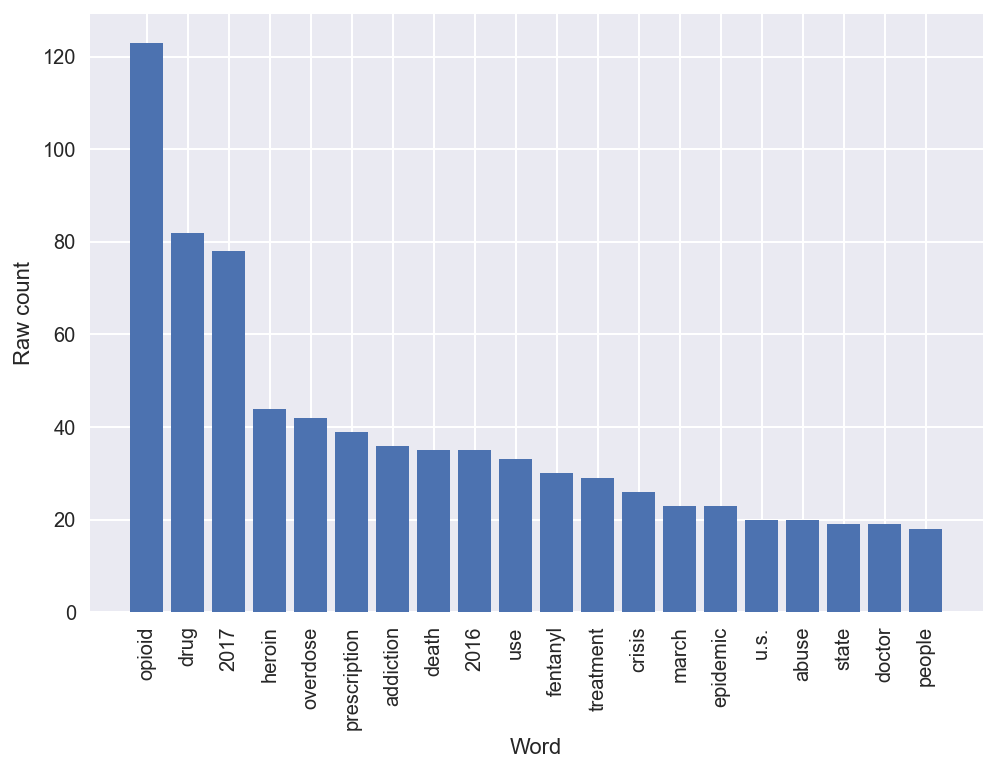

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  # prettier plots (for example, use 'ggplot' instead of 'seaborn' for plots like in R)
%config InlineBackend.figure_format = 'retina'  # if you use a Mac with Retina display

num_top_words_to_plot = 20
plt.bar(range(num_top_words_to_plot), top_counts[:num_top_words_to_plot])
plt.xticks(range(num_top_words_to_plot), top_words[:num_top_words_to_plot], rotation=90)
plt.xlabel('Word')
plt.ylabel('Raw count')